# Учимся работе с данными - от загрузки до моделирования

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_curve, roc_auc_score, classification_report,
                           confusion_matrix, ConfusionMatrixDisplay)
import seaborn as sns

# Часть 1. EDA
# 1. Скачайте датасет по ссылке

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\oevlannikov\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


In [5]:
path = path + "\data.csv"
print(path)

C:\Users\oevlannikov\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2\data.csv


In [35]:
df = pd.read_csv(data)
df.head(30)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,NaN


In [36]:
# 2. Посмотрите на базовые статистики датасета: средние, медианы и т.д.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [37]:
# пустой столбец, остальные заполнены:
df = df.drop(columns=['Unnamed: 32'])
# id неважно для анализов
df = df.drop(columns=['id'])
# закодируем буквы в циферки чтобы что-то с ними потом делать:

df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1}).astype(int)

In [38]:

df.info()
print(df.describe().round(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [39]:
# Выбираем только числовые колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    print(f"\n--- {col} ---")
    print(f"Среднее (mean):      {df[col].mean():.4f}")
    print(f"Медиана (median):    {df[col].median():.4f}")
    print(f"Мода (mode):         {df[col].mode().values[0]:.4f}")
    print(f"Станд. отклонение:   {df[col].std():.4f}")
    print(f"Дисперсия:           {df[col].var():.4f}")
    print(f"Минимум:             {df[col].min():.4f}")
    print(f"Максимум:            {df[col].max():.4f}")
    print(f"Размах:              {df[col].max() - df[col].min():.4f}")
    print(f"Асимметрия (skew):   {df[col].skew():.4f}")
    print(f"Эксцесс (kurtosis):  {df[col].kurtosis():.4f}")


--- diagnosis ---
Среднее (mean):      0.3726
Медиана (median):    0.0000
Мода (mode):         0.0000
Станд. отклонение:   0.4839
Дисперсия:           0.2342
Минимум:             0.0000
Максимум:            1.0000
Размах:              1.0000
Асимметрия (skew):   0.5285
Эксцесс (kurtosis):  -1.7268

--- radius_mean ---
Среднее (mean):      14.1273
Медиана (median):    13.3700
Мода (mode):         12.3400
Станд. отклонение:   3.5240
Дисперсия:           12.4189
Минимум:             6.9810
Максимум:            28.1100
Размах:              21.1290
Асимметрия (skew):   0.9424
Эксцесс (kurtosis):  0.8455

--- texture_mean ---
Среднее (mean):      19.2896
Медиана (median):    18.8400
Мода (mode):         14.9300
Станд. отклонение:   4.3010
Дисперсия:           18.4989
Минимум:             9.7100
Максимум:            39.2800
Размах:              29.5700
Асимметрия (skew):   0.6504
Эксцесс (kurtosis):  0.7583

--- perimeter_mean ---
Среднее (mean):      91.9690
Медиана (median):    86.2400
Мод

In [40]:
# Группировка по диагнозу
grouped_stats = df.groupby('diagnosis').describe().round(4)
print(grouped_stats)

          radius_mean                                                         \
                count     mean     std     min     25%     50%    75%    max   
diagnosis                                                                      
0               357.0  12.1465  1.7805   6.981  11.080  12.200  13.37  17.85   
1               212.0  17.4628  3.2040  10.950  15.075  17.325  19.59  28.11   

          texture_mean           ... symmetry_worst          \
                 count     mean  ...            75%     max   
diagnosis                        ...                          
0                357.0  17.9148  ...         0.2983  0.4228   
1                212.0  21.6049  ...         0.3592  0.6638   

          fractal_dimension_worst                                          \
                            count    mean     std     min     25%     50%   
diagnosis                                                                   
0                           357.0  0.0794  0.0138  0

In [109]:
# Корреляция с диагнозом
correlations = df[numeric_cols].corrwith(df['diagnosis']).abs().sort_values(ascending=False)
print("Топ-9 признаков, наиболее коррелирующих с диагнозом:")
correlations = correlations.head(10).round(4)
correlations = correlations.tail(9).round(4)
print(correlations.index)



Топ-9 признаков, наиболее коррелирующих с диагнозом:
Index(['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean',
       'area_mean', 'concavity_mean'],
      dtype='object')


In [110]:
# Set up label column
y_column = "diagnosis"

# Select X columns
X_columns = correlations.index
print(X_columns)

Index(['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean',
       'area_mean', 'concavity_mean'],
      dtype='object')


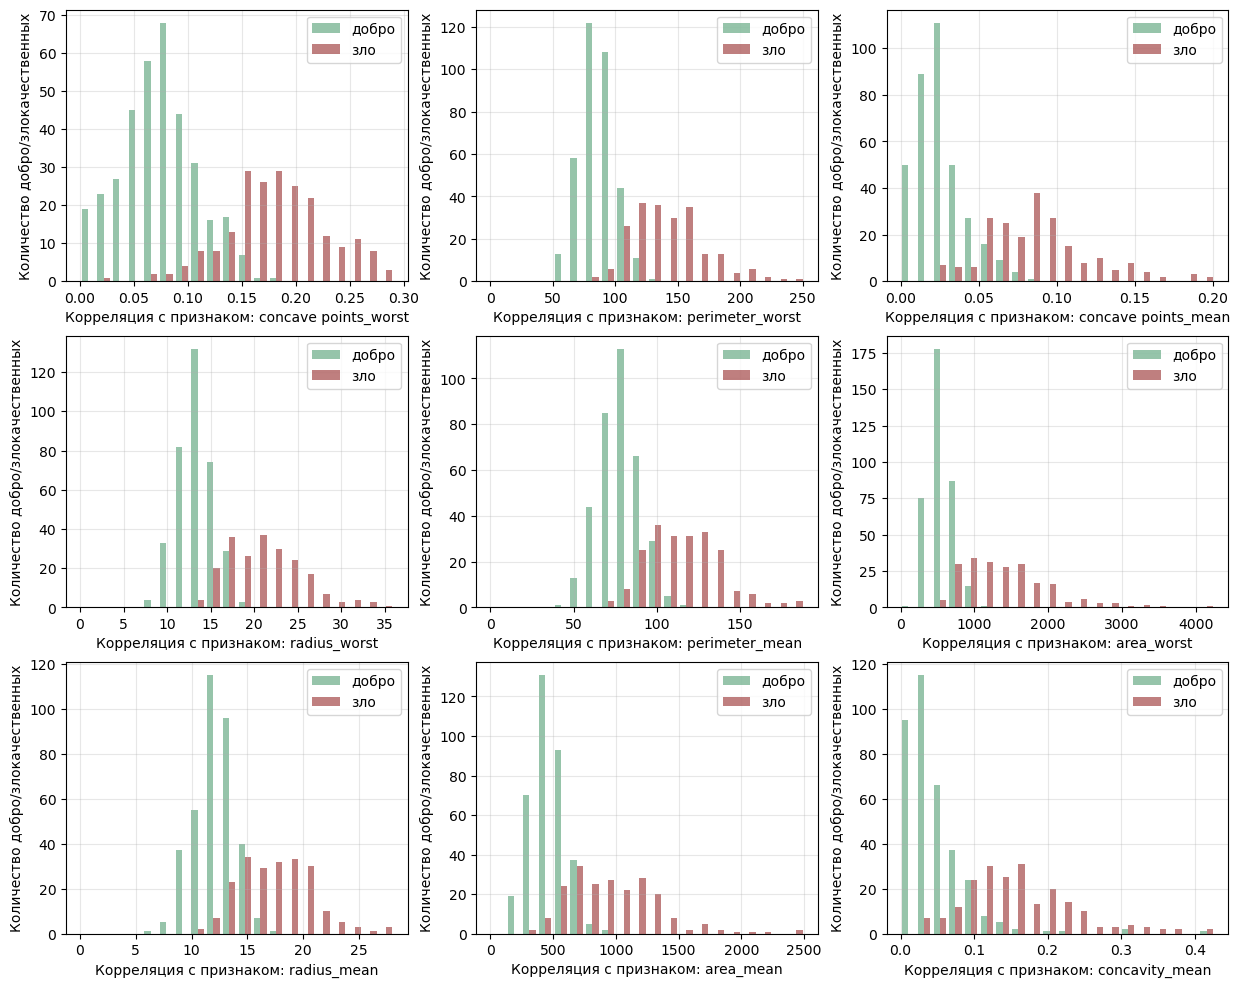

In [129]:
# 3. Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы.


plt.figure(figsize=(15, 12))

# For each column ...
for i_col in range(len(X_columns)):

    # Create subplot for each column
    plt.subplot(3, 3, i_col+1)

    # Get column and label values (cast to float to avoid warnings)
    x_col = df[X_columns[i_col]].astype(float).values
    y_col = df[y_column].values

    # Calculate bins and bin width
    bins = np.linspace(0, x_col.max(), 21)
    bin_width = bins[1] - bins[0]
    bar_width = bin_width * 0.4

    # Calculate histograms
    hist_0, edges_0 = np.histogram(x_col[y_col == 0], bins=bins)
    hist_1, edges_1 = np.histogram(x_col[y_col == 1], bins=bins)

    # Adjust bin centers
    bin_centers_0 = (edges_0[:-1] + edges_0[1:]) / 2 - bar_width / 2
    bin_centers_1 = (edges_1[:-1] + edges_1[1:]) / 2 + bar_width / 2

    # Plot histograms
    plt.bar(bin_centers_0, hist_0, width=bar_width, color='seagreen', alpha=0.5, label='добро')
    plt.bar(bin_centers_1, hist_1, width=bar_width, color='maroon', alpha=0.5, label='зло')

    plt.xlabel('Корреляция с признаком: ' + X_columns[i_col])
    plt.ylabel('Количество добро/злокачественных')
    plt.legend(loc='best')
    plt.grid(alpha=0.3)

plt.show()

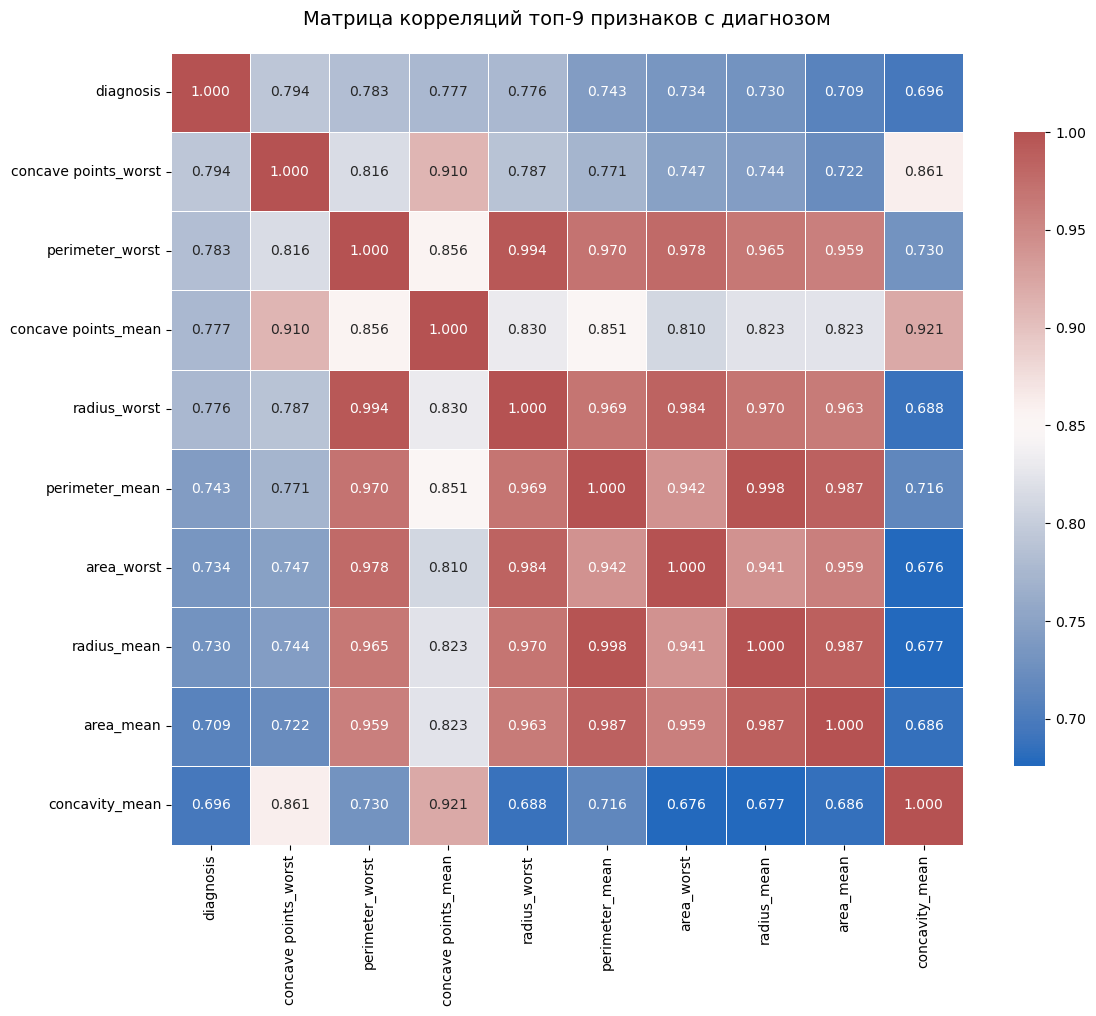

In [131]:
# 4/ Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?

# Получаем топ-9 признаков (исключая diagnosis)
top_features = correlations.index.tolist() 

# Создаем матрицу корреляций для топ-признаков + diagnosis
corr_matrix = df[['diagnosis'] + top_features].corr()

# Построение heatmap
#midpoint = (corr_matrix.values.max() - corr_matrix.values.min()) / 2

midpoint = 0.85


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,            # показывать значения
            fmt='.3f',             # формат значений (3 знака после запятой)
            cmap='vlag',          # цветовая схема
            center=midpoint,       # центр цветовой шкалы
            square=True,           # квадратные ячейки
            linewidths=0.5,        # ширина линий между ячейками
            cbar_kws={"shrink": 0.8})  # размер цветовой шкалы

plt.title('Матрица корреляций топ-9 признаков с диагнозом', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

Найдено 25 пар с |корреляцией| > 0.8:
perimeter_mean — radius_mean: 0.998
perimeter_worst — radius_worst: 0.994
radius_mean — area_mean: 0.987
perimeter_mean — area_mean: 0.987
radius_worst — area_worst: 0.984
perimeter_worst — area_worst: 0.978
perimeter_worst — perimeter_mean: 0.970
radius_worst — radius_mean: 0.970
radius_worst — perimeter_mean: 0.969
perimeter_worst — radius_mean: 0.965


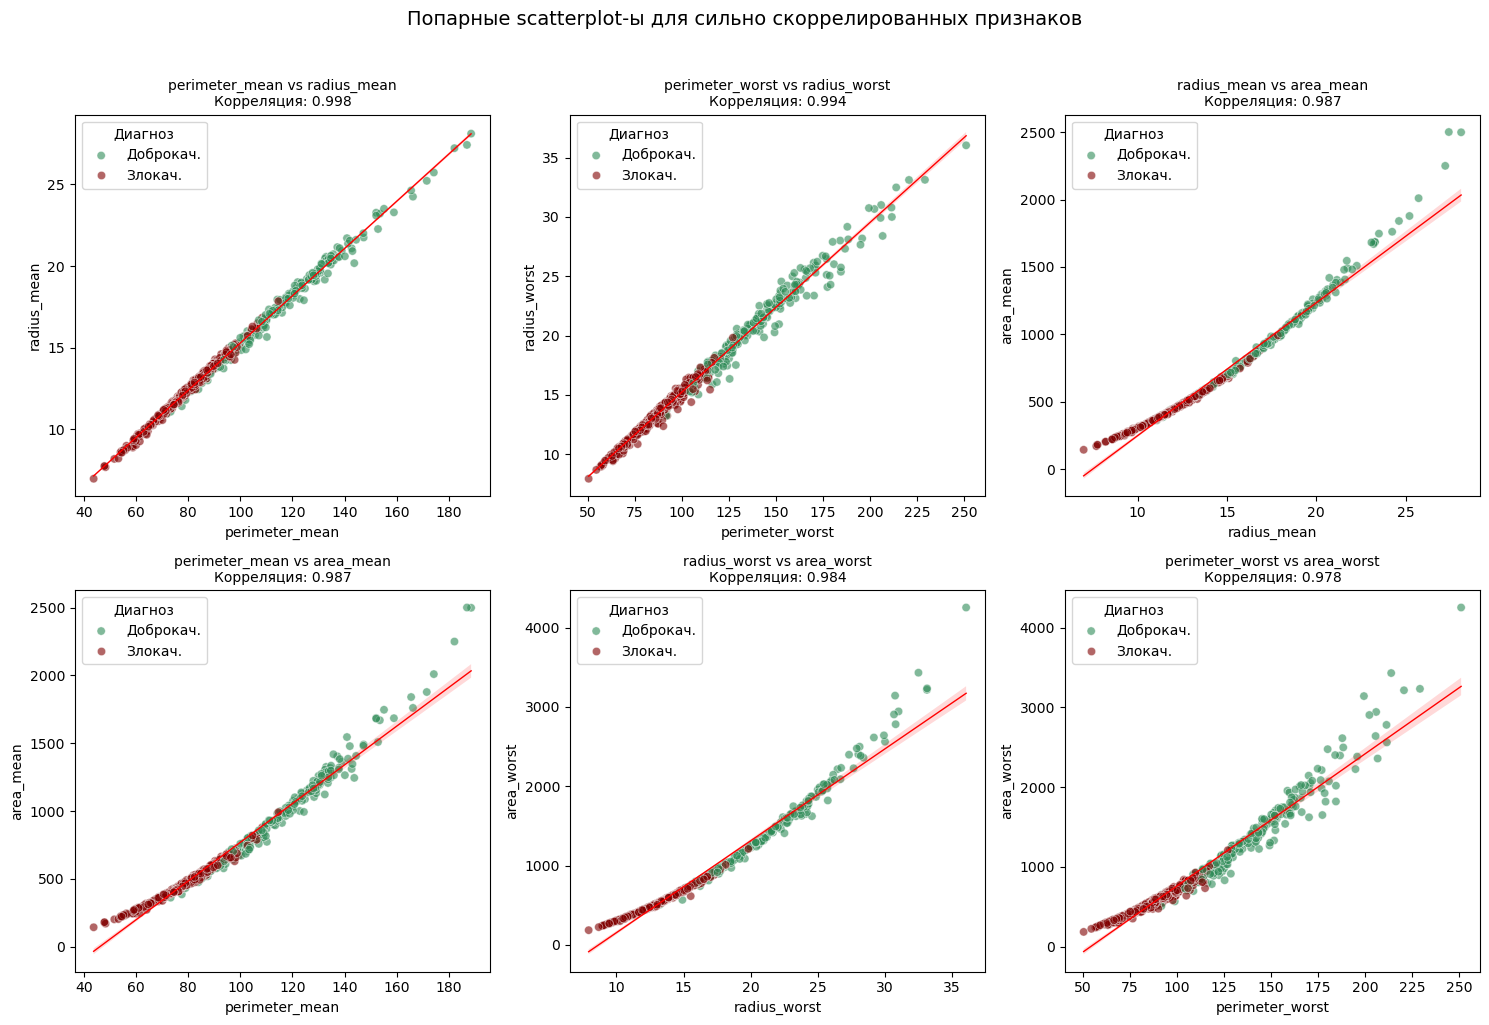

In [136]:
# Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?
# Создаем маску для верхнего треугольника (чтобы не дублировать пары)
upper_tri_mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Находим пары с корреляцией выше порога (например, > 0.8 или < -0.8)
threshold = 0.8
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Сортируем по абсолютной корреляции
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print(f"Найдено {len(high_corr_pairs)} пар с |корреляцией| > {threshold}:")
for feat1, feat2, corr in high_corr_pairs[:10]:  # покажем топ-10
    print(f"{feat1} — {feat2}: {corr:.3f}")

# 2. Построим scatterplot-ы для топ-6 самых сильных пар
n_pairs = min(6, len(high_corr_pairs))
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

diagnosis_colors = {0: 'maroon', 1: 'seagreen'}

for idx, (feat1, feat2, corr) in enumerate(high_corr_pairs[:n_pairs]):
    # Scatter plot с цветовым кодированием по диагнозу
    sns.scatterplot(data=df, x=feat1, y=feat2, hue='diagnosis', 
                   palette=diagnosis_colors, alpha=0.6, ax=axes[idx])
    
    # Добавляем линию регрессии
    sns.regplot(data=df, x=feat1, y=feat2, scatter=False, line_kws={'lw': 1, 'color': 'red'},
                ax=axes[idx])
    
    axes[idx].set_title(f'{feat1} vs {feat2}\nКорреляция: {corr:.3f}', fontsize=10)
    axes[idx].legend(title='Диагноз', labels=['Доброкач.', 'Злокач.'])

# Скрываем пустые подграфики
for idx in range(n_pairs, len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Попарные scatterplot-ы для сильно скоррелированных признаков', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [137]:
# 6. Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных.

print("Анализируемые признаки:", top_features)

Анализируемые признаки: ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean']


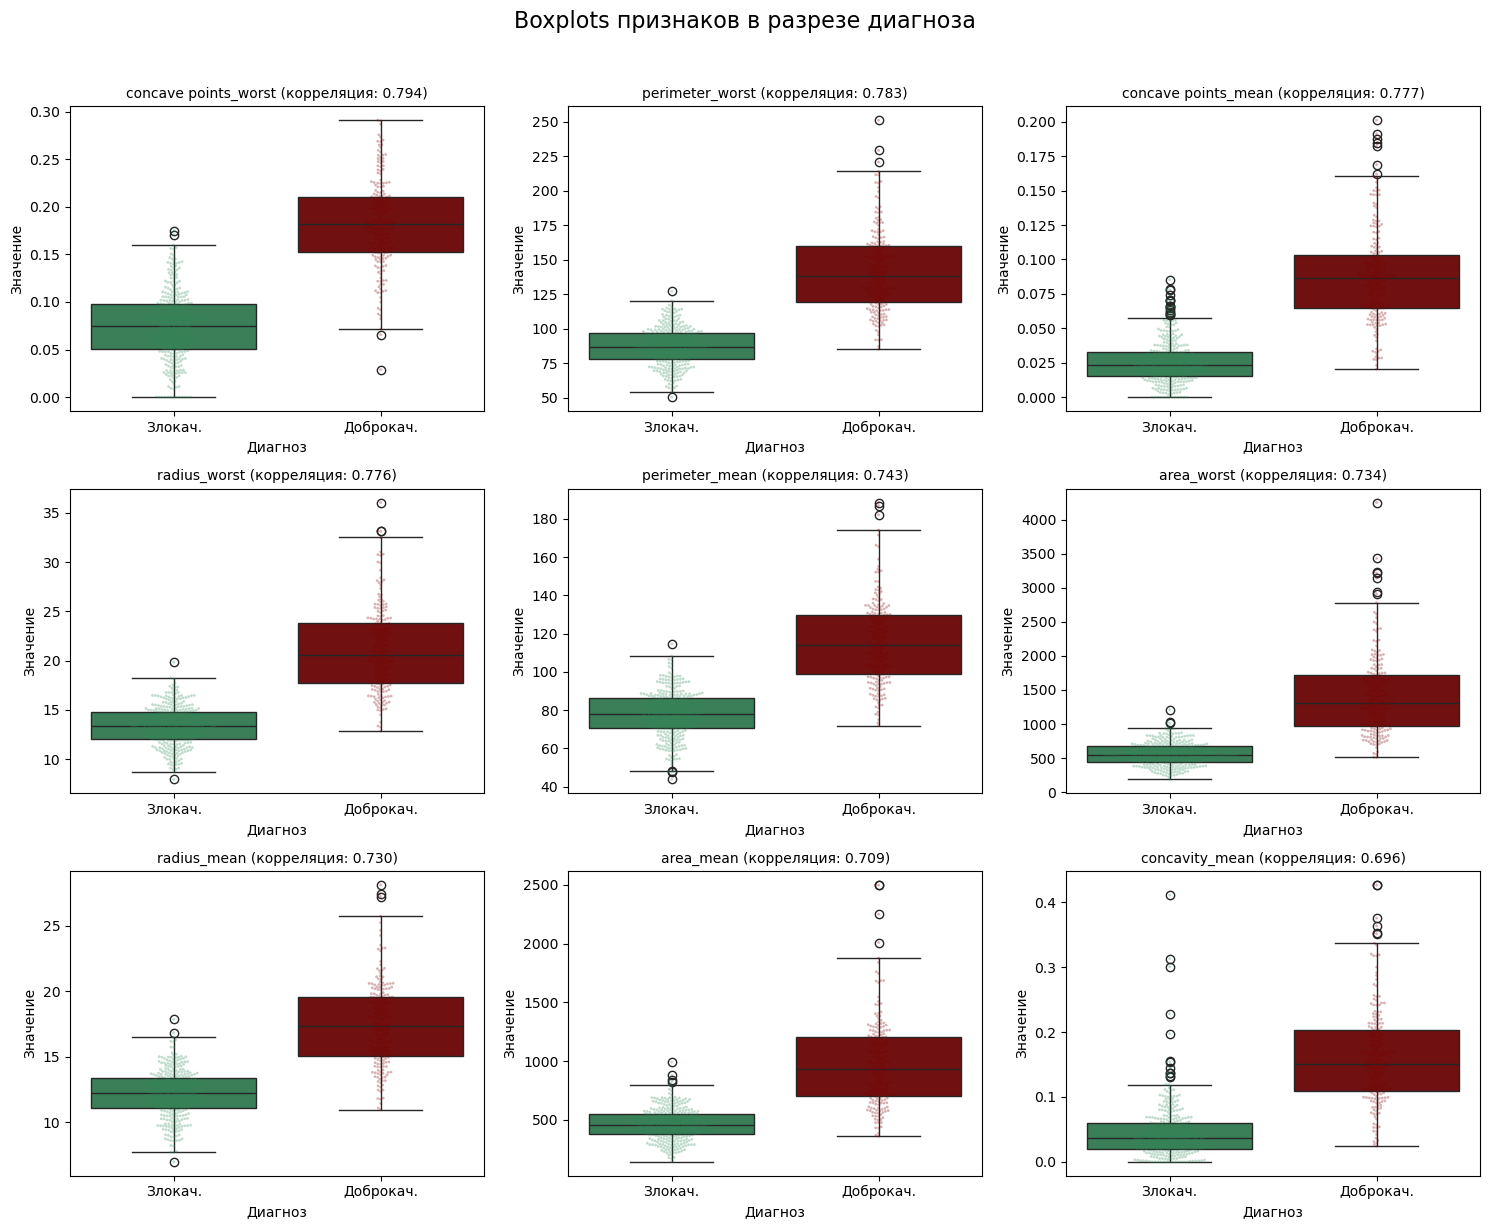

In [144]:
# 
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    # Создаем boxplot
    bp = sns.boxplot(data=df, x='diagnosis', y=feature, 
                     hue='diagnosis',
                     palette={1: 'maroon', 0: 'seagreen'}, 
                     legend=False,
                     ax=axes[idx])
    
    # Добавляем swarmplot
    sns.swarmplot(data=df, x='diagnosis', y=feature, 
                  hue='diagnosis',
                  palette={1: 'maroon', 0: 'seagreen'},
                  legend=False,
                  color='black', alpha=0.3, size=2, ax=axes[idx])
    
    # Правильный способ установки меток
    axes[idx].set_title(f'{feature} (корреляция: {correlations[feature]:.3f})', fontsize=10)
    axes[idx].set_xlabel('Диагноз')
    axes[idx].set_ylabel('Значение')
    
    # Устанавливаем позиции тиков и затем метки
    axes[idx].set_xticks([0, 1])  # Сначала устанавливаем позиции
    axes[idx].set_xticklabels(['Злокач.', 'Доброкач.'])  # Затем метки

plt.suptitle('Boxplots признаков в разрезе диагноза', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [217]:
# Часть 2. Моделирование при помощи kNN

# Разбейте данные на train-test, отложив 30% выборки для тестирования.
# Отделяем признаки от целевой переменной
X = df[numeric_cols]  # или используйте конкретный набор признаков
y = df['diagnosis']

# Разбиваем данные
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,           # 30% для тестирования
    random_state=777,         # для воспроизводимости
    stratify=y              # сохраняем пропорцию классов
)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print(f"\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))

Размер обучающей выборки: (398, 31)
Размер тестовой выборки: (171, 31)

Распределение классов в обучающей выборке:
diagnosis
0    0.628141
1    0.371859
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
diagnosis
0    0.625731
1    0.374269
Name: proportion, dtype: float64


In [218]:
# Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна.

# ПОЧЕМУ НУЖНА СТАНДАРТИЗАЦИЯ ДЛЯ kNN?

# 1. kNN использует расстояния между точками (обычно евклидово расстояние)
# 2. Признаки с большими значениями (например, площадь ядра: 100-2000) будут 
#    доминировать над признаками с малыми значениями (например, гладкость: 0.05-0.15)
# 3. Без стандартизации признаки с большими значениями будут вносить 
#    непропорционально большой вклад в расчет расстояний
# 4. Стандартизация приводит все признаки к одному масштабу (среднее=0, стд=1),
#    что дает им равный "вес" при расчете расстояний

scaler = StandardScaler()

# Обучаем scaler на тренировочных данных и преобразуем их
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # используем тот же scaler для тестовых данных

# Преобразуем обратно в DataFrame для удобства
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nСтатистика после стандартизации (обучающая выборка):")
print(f"Среднее значение (должно быть ~0): {X_train_scaled.mean().mean():.6f}")
print(f"Стандартное отклонение (должно быть ~1): {X_train_scaled.std().mean():.6f}")

# Демонстрация важности стандартизации на примере
print("\nДЕМОНСТРАЦИЯ ВАЖНОСТИ СТАНДАРТИЗАЦИИ:")
print("Диапазоны значений признаков до стандартизации:")
for col in X_train.columns[:3]:  # покажем первые 3 признака
    print(f"  {col}: [{X_train[col].min():.2f}, {X_train[col].max():.2f}]")

print("\nПосле стандартизации (все признаки имеют одинаковый масштаб):")
for col in X_train_scaled.columns[:3]:
    print(f"  {col}: [{X_train_scaled[col].min():.2f}, {X_train_scaled[col].max():.2f}]")


Статистика после стандартизации (обучающая выборка):
Среднее значение (должно быть ~0): -0.000000
Стандартное отклонение (должно быть ~1): 1.001259

ДЕМОНСТРАЦИЯ ВАЖНОСТИ СТАНДАРТИЗАЦИИ:
Диапазоны значений признаков до стандартизации:
  diagnosis: [0.00, 1.00]
  radius_mean: [6.98, 28.11]
  texture_mean: [9.71, 39.28]

После стандартизации (все признаки имеют одинаковый масштаб):
  diagnosis: [-0.77, 1.30]
  radius_mean: [-2.00, 3.94]
  texture_mean: [-2.20, 4.60]


In [221]:
# Постройте модель kNN «из коробки» без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.
# Создаем модель с параметрами по умолчанию (n_neighbors=5)
knn_default = KNeighborsClassifier(n_neighbors=55)
knn_default.fit(X_train_scaled, y_train)
print(f"Параметры модели по умолчанию: {knn_default.get_params()}")

# Обучаем модель
knn_default.fit(X_train_scaled, y_train)

# Предсказания
y_train_pred_default = knn_default.predict(X_train_scaled)
y_test_pred_default = knn_default.predict(X_test_scaled)
y_test_pred_proba_default = knn_default.predict_proba(X_test_scaled)[:, 1]

# Матрица ошибок
print("\nМатрица ошибок (Confusion Matrix):")
cm = confusion_matrix(y_test, y_test_pred_default)
cm_df = pd.DataFrame(cm,
                     index=['Факт: B (0)', 'Факт: M (1)'],
                     columns=['Прогноз: B (0)', 'Прогноз: M (1)'])
print(cm_df)


# Метрики на тестовых данных
test_accuracy_default = accuracy_score(y_test, y_test_pred_default)
test_precision_default = precision_score(y_test, y_test_pred_default)
test_recall_default = recall_score(y_test, y_test_pred_default)
test_f1_default = f1_score(y_test, y_test_pred_default)
test_auc_default = roc_auc_score(y_test, y_test_pred_proba_default)

print("\nМЕТРИКИ НА ТЕСТОВЫХ ДАННЫХ (kNN по умолчанию):")
print(f"Accuracy:  {test_accuracy_default:.4f}")
print(f"Precision: {test_precision_default:.4f}")
print(f"Recall:    {test_recall_default:.4f}")
print(f"F1-score:  {test_f1_default:.4f}")
print(f"AUC-ROC:   {test_auc_default:.4f}")

print("\nКЛАССИФИКАЦИОННЫЙ ОТЧЕТ:")
print(classification_report(y_test, y_test_pred_default, 
                          target_names=['Злокачественная', 'Доброкачественная']))


Параметры модели по умолчанию: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 55, 'p': 2, 'weights': 'uniform'}

Матрица ошибок (Confusion Matrix):
             Прогноз: B (0)  Прогноз: M (1)
Факт: B (0)             107               0
Факт: M (1)               5              59

МЕТРИКИ НА ТЕСТОВЫХ ДАННЫХ (kNN по умолчанию):
Accuracy:  0.9708
Precision: 1.0000
Recall:    0.9219
F1-score:  0.9593
AUC-ROC:   0.9993

КЛАССИФИКАЦИОННЫЙ ОТЧЕТ:
                   precision    recall  f1-score   support

  Злокачественная       0.96      1.00      0.98       107
Доброкачественная       1.00      0.92      0.96        64

         accuracy                           0.97       171
        macro avg       0.98      0.96      0.97       171
     weighted avg       0.97      0.97      0.97       171



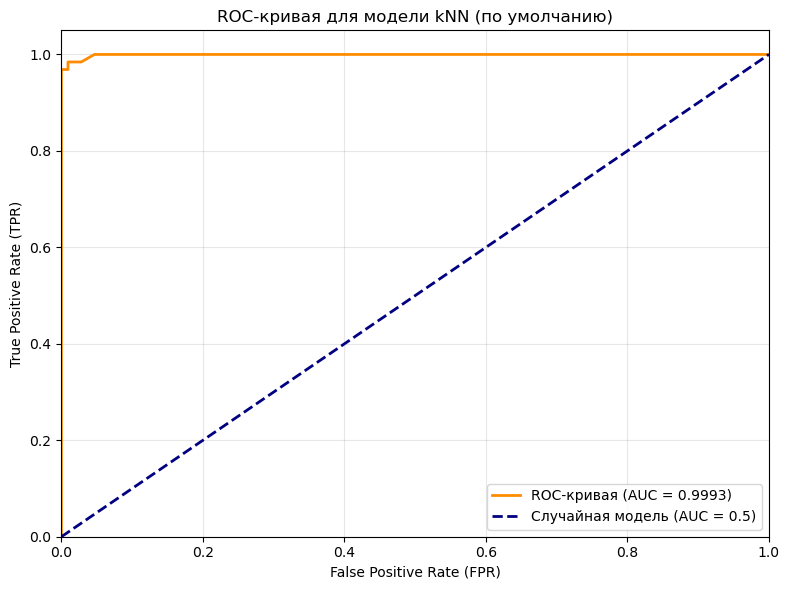

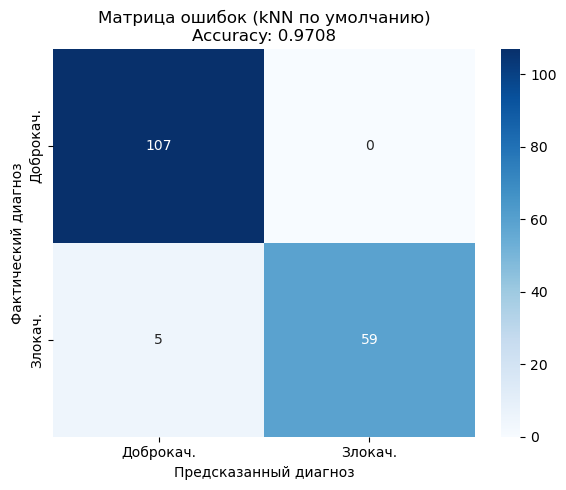

In [222]:
# ROC-кривая
plt.figure(figsize=(8, 6))

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba_default)
roc_auc = roc_auc_score(y_test, y_test_pred_proba_default)

plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC-кривая (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Случайная модель (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для модели kNN (по умолчанию)')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Матрица ошибок
cm_default = confusion_matrix(y_test, y_test_pred_default)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Доброкач.', 'Злокач.'],
            yticklabels=['Доброкач.', 'Злокач.'])
plt.title(f'Матрица ошибок (kNN по умолчанию)\nAccuracy: {test_accuracy_default:.4f}')
plt.ylabel('Фактический диагноз')
plt.xlabel('Предсказанный диагноз')
plt.tight_layout()
plt.show()

In [224]:
# Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
# Определяем диапазон значений k для перебора
k_range = range(1, 31)

# Создаем словарь параметров для GridSearchCV
param_grid = {'n_neighbors': k_range}

# Создаем модель kNN
knn = KNeighborsClassifier()
# Настраиваем кросс-валидацию (5-fold stratified)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Выполняем GridSearchCV
print("Выполняется подбор оптимального k на кросс-валидации...")
grid_search = GridSearchCV(
    knn, 
    param_grid, 
    cv=cv_strategy, 
    scoring='accuracy',  # оптимизируем по accuracy
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)





Выполняется подбор оптимального k на кросс-валидации...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy',
             verbose=1)


Лучшее значение k: 1
Лучшая точность на кросс-валидации: 0.9950


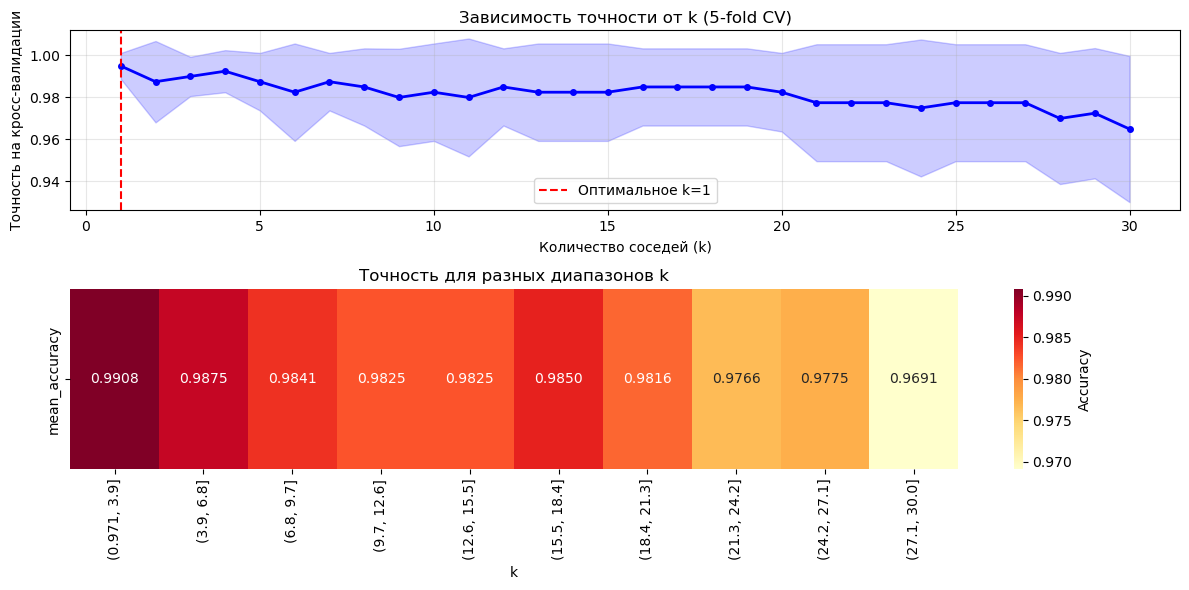

In [225]:
# Результаты поиска
print(f"\nЛучшее значение k: {grid_search.best_params_['n_neighbors']}")
print(f"Лучшая точность на кросс-валидации: {grid_search.best_score_:.4f}")

# Визуализация результатов кросс-валидации
cv_results = pd.DataFrame(grid_search.cv_results_)
# График зависимости точности от k
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(k_range, cv_results['mean_test_score'], 'o-', color='blue', linewidth=2, markersize=4)
plt.fill_between(k_range, 
                 cv_results['mean_test_score'] - cv_results['std_test_score'],
                 cv_results['mean_test_score'] + cv_results['std_test_score'],
                 alpha=0.2, color='blue')

plt.axvline(x=grid_search.best_params_['n_neighbors'], 
            color='red', linestyle='--', label=f'Оптимальное k={grid_search.best_params_["n_neighbors"]}')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность на кросс-валидации')
plt.title('Зависимость точности от k (5-fold CV)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 31, 5))

# Тепловая карта для всех метрик
plt.subplot(2, 1, 2)
metrics_df = pd.DataFrame({
    'k': k_range,
    'mean_accuracy': cv_results['mean_test_score'],
    'std_accuracy': cv_results['std_test_score']
})

# Создаем матрицу для тепловой карты
heatmap_data = metrics_df.pivot_table(observed=False, values='mean_accuracy', index=pd.cut(metrics_df['k'], bins=10))
sns.heatmap(heatmap_data.T, annot=True, fmt='.4f', cmap='YlOrRd', cbar_kws={'label': 'Accuracy'})
plt.title('Точность для разных диапазонов k')
plt.tight_layout()
plt.show()

In [226]:
# ОЦЕНКА ОПТИМАЛЬНОЙ МОДЕЛИ
# Получаем лучшую модель
knn_tuned = grid_search.best_estimator_

# Предсказания оптимальной модели
y_train_pred_tuned = knn_tuned.predict(X_train_scaled)
y_test_pred_tuned = knn_tuned.predict(X_test_scaled)
y_test_pred_proba_tuned = knn_tuned.predict_proba(X_test_scaled)[:, 1]

# Метрики оптимальной модели
test_accuracy_tuned = accuracy_score(y_test, y_test_pred_tuned)
test_precision_tuned = precision_score(y_test, y_test_pred_tuned)
test_recall_tuned = recall_score(y_test, y_test_pred_tuned)
test_f1_tuned = f1_score(y_test, y_test_pred_tuned)
test_auc_tuned = roc_auc_score(y_test, y_test_pred_proba_tuned)

print("\nМЕТРИКИ ОПТИМАЛЬНОЙ МОДЕЛИ (после настройки):")
print(f"Оптимальное k: {grid_search.best_params_['n_neighbors']}")
print(f"Accuracy:  {test_accuracy_tuned:.4f}")
print(f"Precision: {test_precision_tuned:.4f}")
print(f"Recall:    {test_recall_tuned:.4f}")
print(f"F1-score:  {test_f1_tuned:.4f}")
print(f"AUC-ROC:   {test_auc_tuned:.4f}")


МЕТРИКИ ОПТИМАЛЬНОЙ МОДЕЛИ (после настройки):
Оптимальное k: 1
Accuracy:  0.9942
Precision: 1.0000
Recall:    0.9844
F1-score:  0.9921
AUC-ROC:   0.9922


СРАВНЕНИЕ МОДЕЛЕЙ: ПО УМОЛЧАНИЮ VS ОПТИМАЛЬНАЯ

📋 СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТРИК:
  Метрика  kNN (k=5, по умолчанию)  kNN (k=1, оптим.)
 Accuracy                   0.9708             0.9942
Precision                   1.0000             1.0000
   Recall                   0.9219             0.9844
 F1-score                   0.9593             0.9921
  AUC-ROC                   0.9993             0.9922


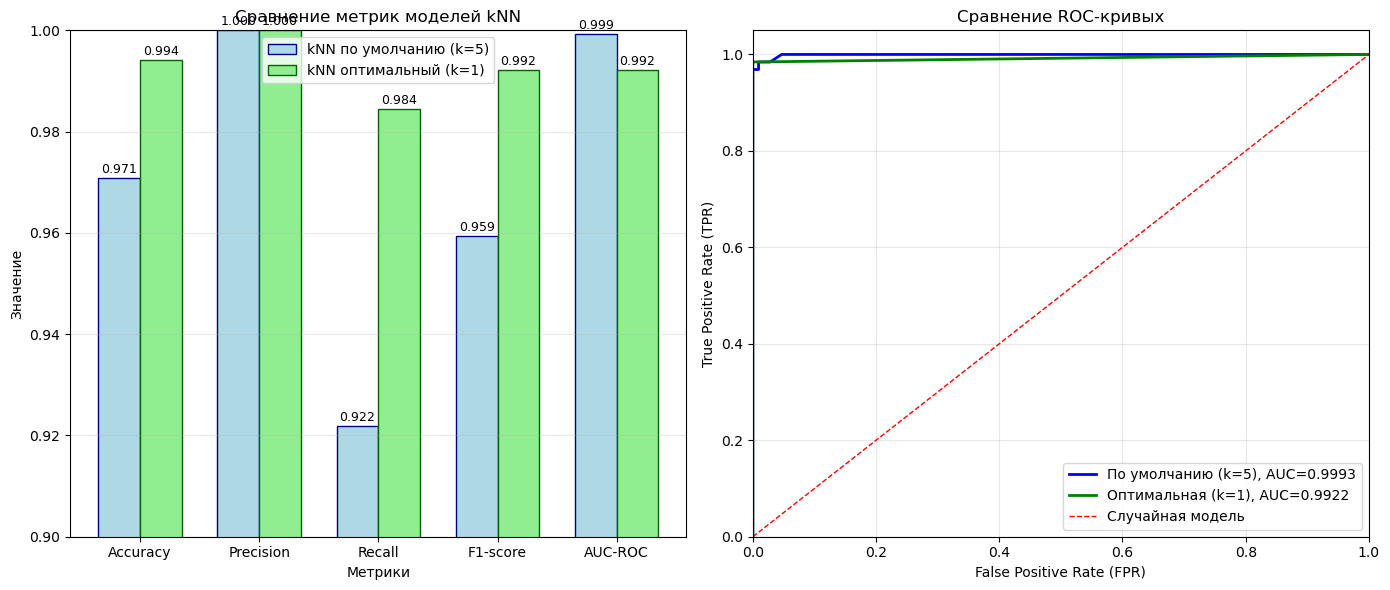

In [228]:
print("СРАВНЕНИЕ МОДЕЛЕЙ: ПО УМОЛЧАНИЮ VS ОПТИМАЛЬНАЯ")
# Сравнительная таблица
comparison_df = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC'],
    'kNN (k=5, по умолчанию)': [
        test_accuracy_default, test_precision_default, 
        test_recall_default, test_f1_default, test_auc_default
    ],
    f'kNN (k={grid_search.best_params_["n_neighbors"]}, оптим.)': [
        test_accuracy_tuned, test_precision_tuned,
        test_recall_tuned, test_f1_tuned, test_auc_tuned
    ]
})

# Округляем до 4 знаков
for col in comparison_df.columns[1:]:
    comparison_df[col] = comparison_df[col].round(4)

print("\n📋 СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТРИК:")
print(comparison_df.to_string(index=False))

# Визуализация сравнения
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Сравнение метрик
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
default_scores = [test_accuracy_default, test_precision_default, 
                  test_recall_default, test_f1_default, test_auc_default]
tuned_scores = [test_accuracy_tuned, test_precision_tuned,
                test_recall_tuned, test_f1_tuned, test_auc_tuned]

x = np.arange(len(metrics))
width = 0.35

bars1 = axes[0].bar(x - width/2, default_scores, width, label='kNN по умолчанию (k=5)', 
                    color='lightblue', edgecolor='navy', linewidth=1)
bars2 = axes[0].bar(x + width/2, tuned_scores, width, 
                    label=f'kNN оптимальный (k={grid_search.best_params_["n_neighbors"]})', 
                    color='lightgreen', edgecolor='darkgreen', linewidth=1)

axes[0].set_xlabel('Метрики')
axes[0].set_ylabel('Значение')
axes[0].set_title('Сравнение метрик моделей kNN')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].set_ylim(0.9, 1.0)
axes[0].grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                    f'{height:.3f}', ha='center', fontsize=9)

# ROC-кривые для сравнения
fpr_default, tpr_default, _ = roc_curve(y_test, y_test_pred_proba_default)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_test_pred_proba_tuned)

axes[1].plot(fpr_default, tpr_default, 'b-', linewidth=2, 
            label=f'По умолчанию (k=5), AUC={test_auc_default:.4f}')
axes[1].plot(fpr_tuned, tpr_tuned, 'g-', linewidth=2,
            label=f'Оптимальная (k={grid_search.best_params_["n_neighbors"]}), AUC={test_auc_tuned:.4f}')
axes[1].plot([0, 1], [0, 1], 'r--', linewidth=1, label='Случайная модель')

axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate (FPR)')
axes[1].set_ylabel('True Positive Rate (TPR)')
axes[1].set_title('Сравнение ROC-кривых')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [229]:
print("\n" + "="*70)
print("ФИНАЛЬНЫЙ ВЫВОД")
print("="*70)

improvement = (test_accuracy_tuned - test_accuracy_default) * 100
improvement_auc = (test_auc_tuned - test_auc_default) * 100

if improvement > 0:
    print(f"Настройка параметров улучшила модель!")
    print(f"   Точность (Accuracy) выросла на {improvement:.2f}%")
    print(f"   AUC-ROC вырос на {improvement_auc:.2f}%")
elif improvement < 0:
    print(f"Настройка параметров не улучшила модель.")
    print(f"   Модель по умолчанию работает лучше на {abs(improvement):.2f}%")
else:
    print(f"Модели показывают одинаковые результаты.")
    print(f"   Оптимальное k совпадает с параметром по умолчанию.")

print(f"\nРекомендуемое значение k: {grid_search.best_params_['n_neighbors']}")


ФИНАЛЬНЫЙ ВЫВОД
Настройка параметров улучшила модель!
   Точность (Accuracy) выросла на 2.34%
   AUC-ROC вырос на -0.71%

Рекомендуемое значение k: 1
